In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
churn_data=pd.read_csv('churn_data.csv')
customer_data=pd.read_csv('customer_data.csv')
internet_data=pd.read_csv('internet_data.csv')

In [3]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
df=pd.merge(churn_data,customer_data,on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [7]:
lst=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in lst:
    print('for {} Categorical variables are {}'.format(i,internet_data[i].unique()))

for MultipleLines Categorical variables are ['No phone service' 'No' 'Yes']
for InternetService Categorical variables are ['DSL' 'Fiber optic' 'No']
for OnlineSecurity Categorical variables are ['No' 'Yes' 'No internet service']
for OnlineBackup Categorical variables are ['Yes' 'No' 'No internet service']
for DeviceProtection Categorical variables are ['No' 'Yes' 'No internet service']
for TechSupport Categorical variables are ['No' 'Yes' 'No internet service']
for StreamingTV Categorical variables are ['No' 'Yes' 'No internet service']
for StreamingMovies Categorical variables are ['No' 'Yes' 'No internet service']


In [8]:
lst2=['PhoneService','Contract','PaperlessBilling','PaymentMethod','Churn','gender','Partner','Dependents']
for i in lst2:
    print('For {} Categorical variables are {}'.format(i,df[i].unique()))

For PhoneService Categorical variables are ['No' 'Yes']
For Contract Categorical variables are ['Month-to-month' 'One year' 'Two year']
For PaperlessBilling Categorical variables are ['Yes' 'No']
For PaymentMethod Categorical variables are ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
For Churn Categorical variables are ['No' 'Yes']
For gender Categorical variables are ['Female' 'Male']
For Partner Categorical variables are ['Yes' 'No']
For Dependents Categorical variables are ['No' 'Yes']


In [9]:
lst3=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

def map(x):
    return x.map({'Yes':1,'No':0})

df[lst3]=df[lst3].apply(map)

In [10]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0


In [11]:
dummy1=pd.get_dummies(df[['Contract','PaymentMethod','gender']],drop_first=True)
dummy1.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0,0,0,1,0,0
1,1,0,0,0,1,1
2,0,0,0,0,1,1
3,1,0,0,0,0,1
4,0,0,0,1,0,0


In [12]:
df2=pd.concat([df,dummy1],axis=1)
df2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,1,0,0,0,1,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,1,0,0,0,0,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,0,0,0,1,0,0


In [13]:
df2.drop(['Contract','PaymentMethod','gender'],axis=1,inplace=True)
df2.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male'],
      dtype='object')

In [14]:
a=pd.get_dummies(internet_data['InternetService'],drop_first=True,prefix='InternetService')

b = pd.get_dummies(internet_data['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
b1= b.drop(['MultipleLines_No phone service'], 1)


# Creating dummy variables for the variable 'OnlineSecurity'.
c = pd.get_dummies(internet_data['OnlineSecurity'], prefix='OnlineSecurity')
c1 = c.drop(['OnlineSecurity_No internet service'], 1)

# Creating dummy variables for the variable 'OnlineBackup'.
d = pd.get_dummies(internet_data['OnlineBackup'], prefix='OnlineBackup')
d1 = d.drop(['OnlineBackup_No internet service'], 1)


# Creating dummy variables for the variable 'DeviceProtection'. 
e = pd.get_dummies(internet_data['DeviceProtection'], prefix='DeviceProtection')
e1 = e.drop(['DeviceProtection_No internet service'], 1)


# Creating dummy variables for the variable 'TechSupport'. 
f = pd.get_dummies(internet_data['TechSupport'], prefix='TechSupport')
f1 = f.drop(['TechSupport_No internet service'], 1)

# Creating dummy variables for the variable 'StreamingTV'.
g =pd.get_dummies(internet_data['StreamingTV'], prefix='StreamingTV')
g1 =g.drop(['StreamingTV_No internet service'], 1)

# Creating dummy variables for the variable 'StreamingMovies'. 
h = pd.get_dummies(internet_data['StreamingMovies'], prefix='StreamingMovies')
h1 = h.drop(['StreamingMovies_No internet service'], 1)


In [15]:
df3=pd.concat([internet_data,a,b1,c1,d1,e1,f1,g1,h1],axis=1)
df3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_Fiber optic,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,1,...,1,0,1,0,1,0,1,0,1,0


In [16]:
df3.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [17]:
df4=df3.drop(['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)
df4.head()

,customerID,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [18]:
data=pd.merge(df2,df4,on="customerID")

In [19]:
data.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [20]:
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [21]:
data.shape

(7043, 32)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [23]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [25]:
data.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [26]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

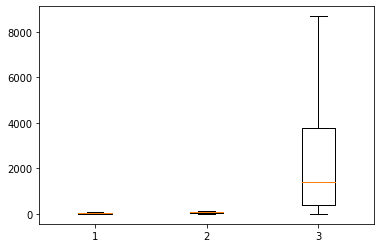

In [28]:
val=['tenure','MonthlyCharges','TotalCharges']
plt.boxplot(data[val])
plt.show()

<AxesSubplot:>

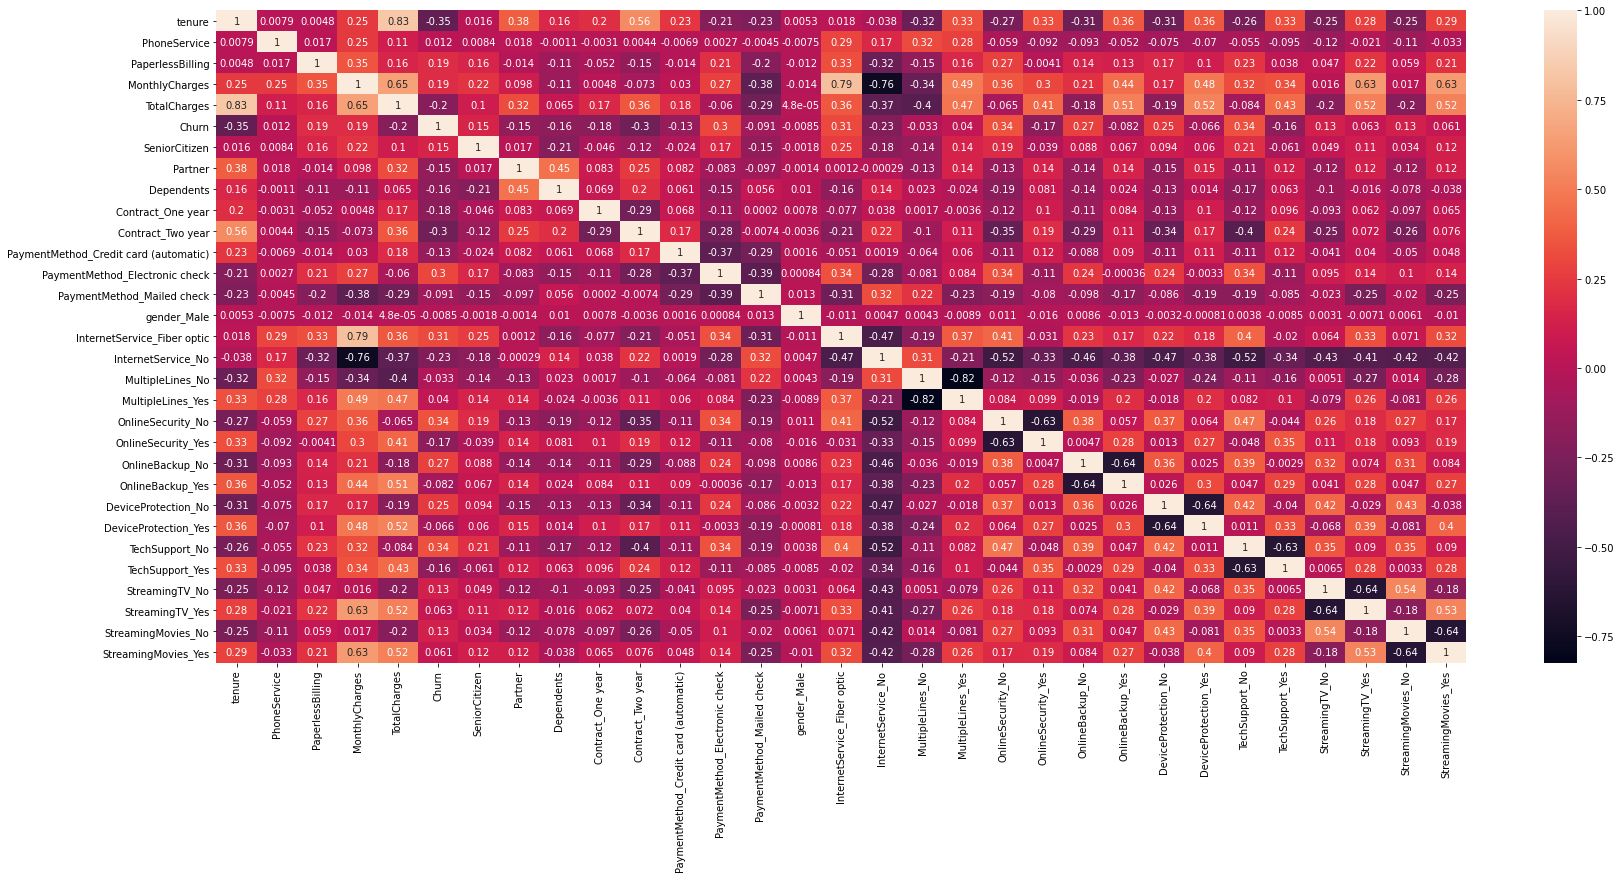

In [29]:
plt.figure(figsize=(28,12))
sb.heatmap(data.corr(),annot=True)

In [30]:
corr_matrix = data.corr()
corr_matrix.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [31]:
def correlation_with_depn(dataset,threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, 5]) <= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
drop_feature=correlation_with_depn(data,0.10)
drop_feature

{'DeviceProtection_Yes',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'OnlineBackup_Yes',
 'PaymentMethod_Mailed check',
 'PhoneService',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'gender_Male'}

In [33]:
data.drop(drop_feature,axis=1,inplace=True)

In [34]:
X=data.drop(['customerID','Churn'],axis=1)
X.head()

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingMovies_No
0,1,1,29.85,29.85,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1
1,34,0,56.95,1889.50,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,1,1
2,2,1,53.85,108.15,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,1
3,45,0,42.30,1840.75,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,1
4,2,1,70.70,151.65,0,0,0,0,0,0,...,1,0,1,0,1,1,1,0,1,1


In [35]:
y=data['Churn']
y[0:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [37]:
print('X Train Size is',X_train.shape)
print('X Test Size is',X_test.shape)
print('Y Train Size is',y_train.shape)
print('Y Test Size is',y_test.shape)


X Train Size is (5625, 21)
X Test Size is (1407, 21)
Y Train Size is (5625,)
Y Test Size is (1407,)


In [38]:
scaler=StandardScaler()

In [39]:
X_train[['tenure','MonthlyCharges','TotalCharges']] =scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingMovies_No
1010,-1.201477,1,-0.483666,-0.937173,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,1
2732,-1.160653,0,-1.472880,-0.966413,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2940,0.839728,1,-0.340687,0.249914,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
859,1.615386,1,0.003460,1.071889,0,1,1,0,1,1,...,0,0,0,1,0,0,0,1,0,0
2895,0.186543,1,-1.491168,-0.691863,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [41]:
X_test

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingMovies_No
942,-0.344171,1,0.503886,-0.126237,0,0,0,0,0,1,...,1,0,1,0,1,1,1,0,1,0
3730,1.003024,1,1.323521,1.601423,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1761,1.043849,1,-1.338214,-0.341029,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2283,-1.283125,1,0.227903,-0.976526,0,0,0,0,0,0,...,1,0,1,0,1,1,1,0,1,1
1872,0.349839,0,-1.496156,-0.653633,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,-1.201477,1,-1.156997,-0.967404,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,1,1
2103,-0.874884,1,0.183015,-0.640214,1,1,0,0,0,0,...,1,0,1,0,1,1,1,0,1,1
4855,1.288793,1,1.308558,1.902943,0,1,0,0,1,1,...,1,0,0,1,0,1,0,1,0,0
4927,-0.099226,0,-1.517769,-0.727096,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


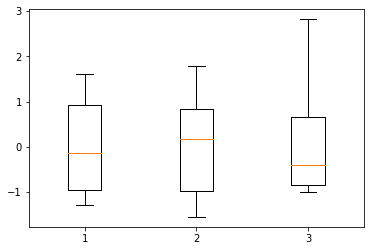

In [42]:
val=['tenure','MonthlyCharges','TotalCharges']
plt.boxplot(X_train[val])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

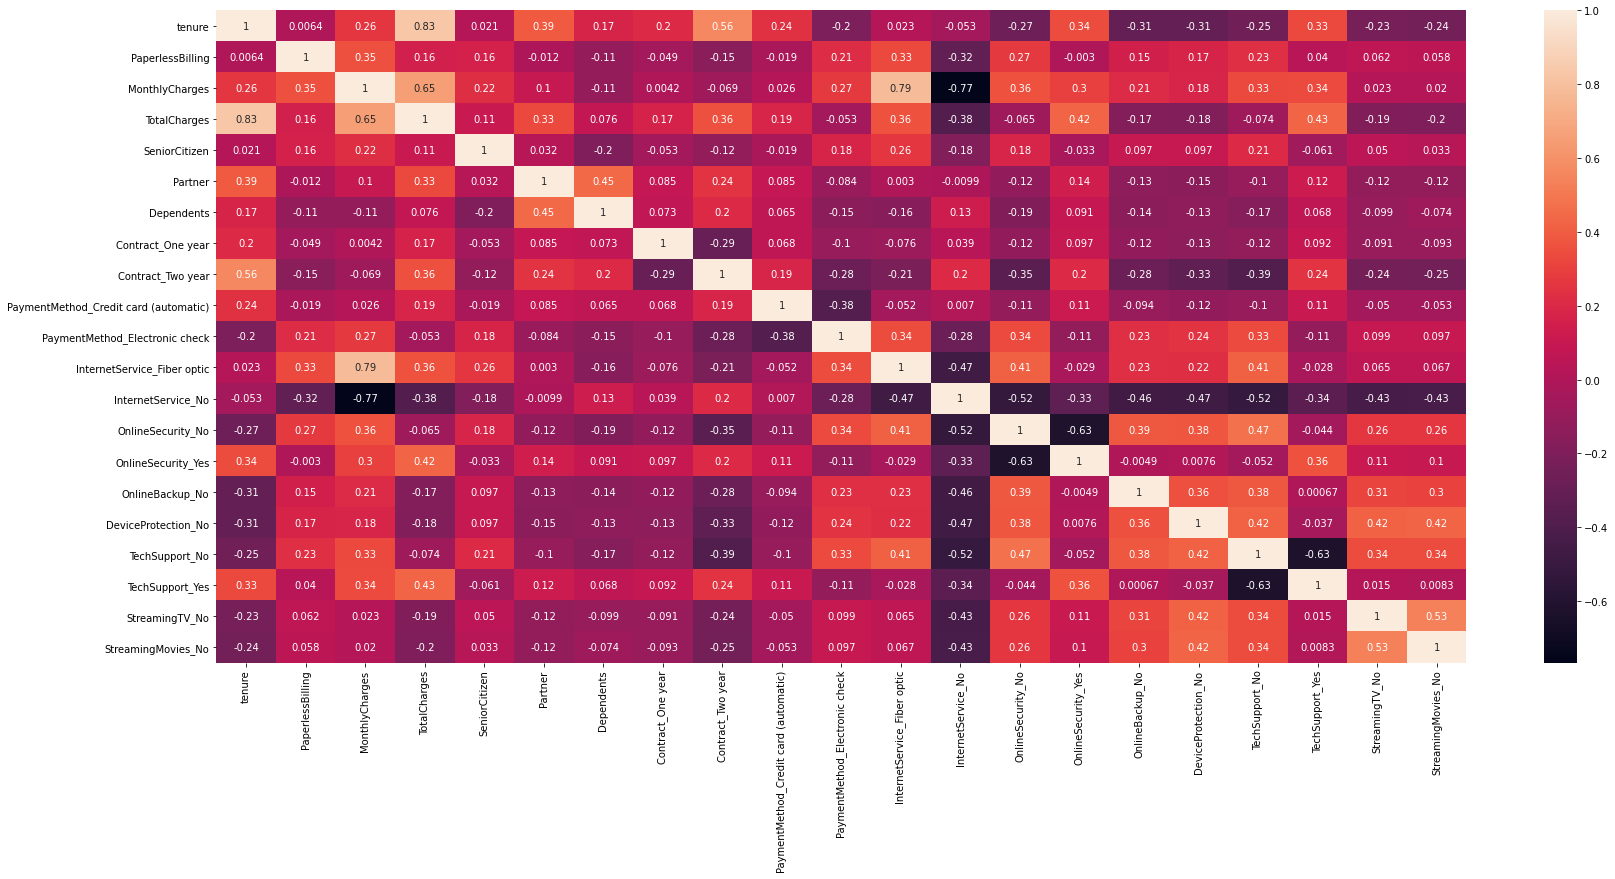

In [43]:
plt.figure(figsize=(28,12))
sb.heatmap(X_train.corr(),annot=True)
plt.show

In [44]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [45]:
corr_features=correlation(X_train, 0.75)
corr_features

{'InternetService_Fiber optic', 'InternetService_No', 'TotalCharges'}

In [46]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [47]:
X_train.head()

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingMovies_No
1010,-1.201477,1,-0.483666,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1
2732,-1.160653,0,-1.472880,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2940,0.839728,1,-0.340687,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
859,1.615386,1,0.003460,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0
2895,0.186543,1,-1.491168,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [48]:
X_train.shape

(5625, 18)

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Modelling

## Logistic Regression

In [50]:
model=LogisticRegression()
k_fold=KFold(10)
result=cross_val_score(model,X_train,y_train,cv=k_fold)
print(result)
print('Mean Train Accuracy is ',result.mean())

[0.8330373  0.81705151 0.79573712 0.79928952 0.78507993 0.78291815
 0.80071174 0.83629893 0.80960854 0.80960854]
Mean Train Accuracy is  0.806934128935608


In [51]:
model = LogisticRegression()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8078222222222222
Testing accuracy : 0.7803837953091685
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1013
           1       0.63      0.53      0.57       394

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407

[[890 123]
 [186 208]]


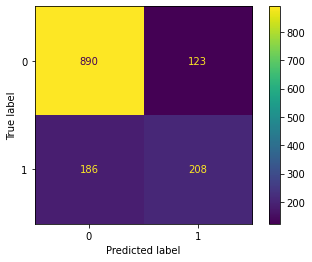

In [52]:
plot_confusion_matrix(model,X_test,y_test)

## Support Vector Machine

In [53]:
model2=SVC()
k_fold=KFold(10)
result=cross_val_score(model2,X_train,y_train,cv=k_fold)
print(result)
print('Mean Train Accuracy is ',result.mean())

[0.81349911 0.79928952 0.79218472 0.79218472 0.78685613 0.76690391
 0.78469751 0.82918149 0.80960854 0.79715302]
Mean Train Accuracy is  0.797155869357724


In [54]:
# feeding the training set into the model
model2.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model2.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 0.8078222222222222
Testing accuracy : 0.7803837953091685


In [55]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1013
           1       0.65      0.50      0.57       394

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407

[[908 105]
 [197 197]]


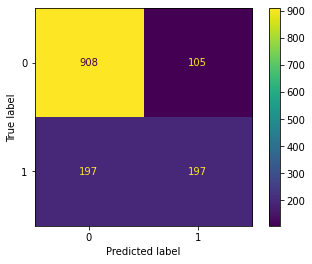

In [56]:
plot_confusion_matrix(model2,X_test,y_test)

## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model4 = DecisionTreeClassifier()
k_fold=KFold(10)
result=cross_val_score(model4,X_train,y_train,cv=k_fold)
print(result)
print('Mean Train Accuracy is ',result.mean())

[0.72824156 0.73179396 0.72113677 0.72113677 0.75488455 0.72597865
 0.74021352 0.74377224 0.73487544 0.74733096]
Mean Train Accuracy is  0.7349364424189175


In [58]:
# feeding the training set into the model
model4.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model4.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model4.score(X_train, y_train))
print("Testing accuracy :", model4.score(X_test, y_test))

Training accuracy : 0.9959111111111111
Testing accuracy : 0.7121535181236673


In [59]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1013
           1       0.49      0.50      0.49       394

    accuracy                           0.71      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.72      0.71      0.71      1407

[[804 209]
 [196 198]]


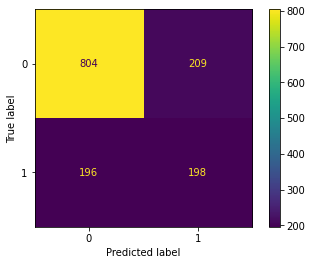

In [60]:
plot_confusion_matrix(model4,X_test,y_test)

## Random Forest

In [61]:
model3=RandomForestClassifier()
k_fold=KFold(10)
result=cross_val_score(model3,X_train,y_train,cv=k_fold)
print(result)
print('Mean Train Accuracy is ',result.mean())

[0.79218472 0.78685613 0.80817052 0.77264654 0.78863233 0.75088968
 0.78825623 0.79715302 0.79359431 0.78825623]
Mean Train Accuracy is  0.7866639697098032


In [62]:
model3.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 0.8078222222222222
Testing accuracy : 0.7803837953091685


In [63]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1013
           1       0.63      0.53      0.57       394

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407

[[890 123]
 [186 208]]


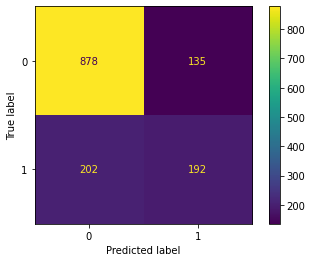

In [64]:
plot_confusion_matrix(model3,X_test,y_test)

In [65]:
X_train.columns

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
       'Partner', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'DeviceProtection_No',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingMovies_No'],
      dtype='object')

In [66]:
len(X_train.columns)

18

# Model has Train Accuracy 80% and Test Accuracy 78%.

In [67]:
pd.DataFrame({'Model':['Logistic','SVM','Decision Tree','Random Forest'],'Train_Accuracy':[80,80,99,80],'Test_Accuracy':[78,78,71,78]},index=None)

,Model,Train_Accuracy,Test_Accuracy
0,Logistic,80,78
1,SVM,80,78
2,Decision Tree,99,71
3,Random Forest,80,78
